# Dados Globais de Violência Contra Mulheres

### Introdução
Em dezembro de 2006, a Assembleia Geral das Nações Unidas adotou uma resolução abrangente pedindo a intensificação dos esforços para eliminar todas as formas de violência contra as mulheres e solicitando ao Secretário-Geral que estabeleça um banco de dados coordenado sobre a extensão, natureza e consequências de todas as formas de violência contra as mulheres.

O banco de dados foi desenvolvido e lançado em 2009 e foi chamado de "banco de dados do Secretário-Geral da ONU sobre violência contra as mulheres". Em 2016, de acordo com a adoção da Agenda 2030 para o Desenvolvimento Sustentável, a ONU Mulheres relançou os bancos de dados como o "Banco de Dados Global sobre Violência contra as Mulheres". Em 2024, o banco de dados foi novamente redesenhado e relançado para permitir que os usuários naveguem mais facilmente por seu extenso conteúdo. 

São 193 Estados-membros das Nações Unidas inclusos no banco de dados. Cada um destes Estados-Membros comunicou pelo menos uma medida de combate à violência contra as mulheres através de relatórios oficiais.

As Nações Unidas definem a violência contra as mulheres como "qualquer ato de violência baseada no gênero que resulte ou possa resultar em dano ou sofrimento físico, sexual ou psicológico às mulheres, incluindo ameaças de tais atos, coerção ou privação arbitrária de liberdade, ocorrendo na vida pública ou privada" (Resolução 48/104 da Assembleia Geral Declaração sobre a Eliminação da Violência contra as Mulheres, 1993).

Mais informações em https://data.unwomen.org/global-database-on-violence-against-women

### Motivação
Encontrar uma DB com informações a níveis globais e como mulheres achamos interessante descobrir como são tratadas estas informações.

### Instalação e Tratamento dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_backup = pd.read_csv("Data_Map_export.csv")

In [3]:
df_backup.shape

(7440, 13)

In [4]:
df = df_backup.copy()

In [5]:
df.shape

(7440, 13)

In [6]:
nulos = df.isnull().sum()
print(nulos)

Template               0
Year                 716
Region                 3
Form of Violence       5
Type of Measure        4
Country                0
Title                  0
Unnamed: 7          7408
Unnamed: 8          7431
Unnamed: 9          7436
Unnamed: 10         7436
Unnamed: 11         7436
Unnamed: 12         7436
dtype: int64


In [7]:
valores_unicos = df['Template'].unique()
print(valores_unicos)

['Measure']


In [8]:
valores_unicos = df['Unnamed: 12'].unique()
print(valores_unicos)

[nan
 'State Fund for the Protection of and Assistance to Victims of Trafficking in Persons'
 'Amendment of Code of Criminal Procedure'
 'Act No. 119/2013 on Gender-Based Violence and Stalking'
 'Corporate Alliance against Gender Violence']


In [9]:
df.columns

Index(['Template', 'Year', 'Region', 'Form of Violence', 'Type of Measure',
       'Country', 'Title', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [10]:
df.drop(["Template", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], axis=1, inplace=True)

In [11]:
df.columns

Index(['Year', 'Region', 'Form of Violence', 'Type of Measure', 'Country',
       'Title'],
      dtype='object')

In [12]:
nulos = df.isnull().sum()
print(nulos)

Year                716
Region                3
Form of Violence      5
Type of Measure       4
Country               0
Title                 0
dtype: int64


In [13]:
duplicados = df.duplicated().sum()
print(duplicados)

1


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7439 entries, 0 to 7439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              6723 non-null   float64
 1   Region            7436 non-null   object 
 2   Form of Violence  7434 non-null   object 
 3   Type of Measure   7435 non-null   object 
 4   Country           7439 non-null   object 
 5   Title             7439 non-null   object 
dtypes: float64(1), object(5)
memory usage: 406.8+ KB


In [16]:
df.describe()

,Year
count,6723.000000
mean,2008.097724
std,9.278981
min,1789.000000
25%,2005.000000
50%,2009.000000
75%,2014.000000
max,2022.000000


In [17]:
df.columns

Index(['Year', 'Region', 'Form of Violence', 'Type of Measure', 'Country',
       'Title'],
      dtype='object')

In [18]:
df.rename(columns={
    'Year': 'Ano',
    'Region': 'Continente',
    'Form of Violence': 'Forma de Violencia',
    'Type of Measure': 'Tipo de Medicao',
    'Country': 'Pais',
    'Title': 'Titulo'
}, inplace=True)

In [19]:
df.columns

Index(['Ano', 'Continente', 'Forma de Violencia', 'Tipo de Medicao', 'Pais',
       'Titulo'],
      dtype='object')

In [20]:
df.head(10)

,Ano,Continente,Forma de Violencia,Tipo de Medicao,Pais,Titulo
0,1984.0,Africa,Sexual violence,Laws > Violence against women > Legislation,Algeria,Article 336 of the Penal Code
1,1996.0,Africa,Violence against women and girls,Laws > Violence against women > Constitutional...,Algeria,Article 34 of the Constitution
2,1996.0,Africa,Violence against women and girls,Laws > Violence against women > Constitutional...,Algeria,Article 35 of the Constitution
3,2000.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Association Femmes En Communication - Actions ...
4,2000.0,Africa,Domestic violence/Intimate partner violence,Research and statistical data > Other research...,Algeria,Lancement De La Stratégie Nationale De Lutte C...
5,2001.0,Africa,Domestic violence/Intimate partner violence; \...,Research and statistical data > Administrative...,Algeria,Police Survey on Violence against Women
6,2002.0,Africa,Violence against women and girls,Services > Social services > Shelter Safe acco...,Algeria,Hébergement Temporaires
7,2002.0,Africa,Domestic violence/Intimate partner violence; \...,Research and statistical data > Dedicated viol...,Algeria,L'enquête Nationale Sur La Violence À L'encont...
8,2003.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Atelier Portant Sur « L'analyse De La Situatio...
9,2004.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Journée Internationale Pour L'élimination De L...


In [21]:
medicao_separada = df['Tipo de Medicao'].str.split(' > ', expand=True)
medicao_separada.columns = ['Medicao Nivel 1', 'Medicao Nivel 2', 'Medicao Nivel 3']
df = pd.concat([df, medicao_separada], axis=1)

In [22]:
df.columns

Index(['Ano', 'Continente', 'Forma de Violencia', 'Tipo de Medicao', 'Pais',
       'Titulo', 'Medicao Nivel 1', 'Medicao Nivel 2', 'Medicao Nivel 3'],
      dtype='object')

In [23]:
df.head(10)

,Ano,Continente,Forma de Violencia,Tipo de Medicao,Pais,Titulo,Medicao Nivel 1,Medicao Nivel 2,Medicao Nivel 3
0,1984.0,Africa,Sexual violence,Laws > Violence against women > Legislation,Algeria,Article 336 of the Penal Code,Laws,Violence against women,Legislation
1,1996.0,Africa,Violence against women and girls,Laws > Violence against women > Constitutional...,Algeria,Article 34 of the Constitution,Laws,Violence against women,Constitutional provision
2,1996.0,Africa,Violence against women and girls,Laws > Violence against women > Constitutional...,Algeria,Article 35 of the Constitution,Laws,Violence against women,Constitutional provision
3,2000.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Association Femmes En Communication - Actions ...,Prevention,Awareness-raising Campaigns,None
4,2000.0,Africa,Domestic violence/Intimate partner violence,Research and statistical data > Other research...,Algeria,Lancement De La Stratégie Nationale De Lutte C...,Research and statistical data,Other research and statistical data,None
5,2001.0,Africa,Domestic violence/Intimate partner violence; \...,Research and statistical data > Administrative...,Algeria,Police Survey on Violence against Women,Research and statistical data,Administrative data,Police
6,2002.0,Africa,Violence against women and girls,Services > Social services > Shelter Safe acco...,Algeria,Hébergement Temporaires,Services,Social services,Shelter Safe accommodation
7,2002.0,Africa,Domestic violence/Intimate partner violence; \...,Research and statistical data > Dedicated viol...,Algeria,L'enquête Nationale Sur La Violence À L'encont...,Research and statistical data,Dedicated violence against women survey,None
8,2003.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Atelier Portant Sur « L'analyse De La Situatio...,Prevention,Awareness-raising Campaigns,None
9,2004.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Journée Internationale Pour L'élimination De L...,Prevention,Awareness-raising Campaigns,None


In [24]:
df["Ano"] = df["Ano"].fillna(0)

In [25]:
df["Ano"] = df["Ano"].astype("Int64")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7439 entries, 0 to 7439
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ano                 7439 non-null   Int64 
 1   Continente          7436 non-null   object
 2   Forma de Violencia  7434 non-null   object
 3   Tipo de Medicao     7435 non-null   object
 4   Pais                7439 non-null   object
 5   Titulo              7439 non-null   object
 6   Medicao Nivel 1     7435 non-null   object
 7   Medicao Nivel 2     6431 non-null   object
 8   Medicao Nivel 3     3919 non-null   object
dtypes: Int64(1), object(8)
memory usage: 588.4+ KB


In [27]:
df.head(10)

,Ano,Continente,Forma de Violencia,Tipo de Medicao,Pais,Titulo,Medicao Nivel 1,Medicao Nivel 2,Medicao Nivel 3
0,1984,Africa,Sexual violence,Laws > Violence against women > Legislation,Algeria,Article 336 of the Penal Code,Laws,Violence against women,Legislation
1,1996,Africa,Violence against women and girls,Laws > Violence against women > Constitutional...,Algeria,Article 34 of the Constitution,Laws,Violence against women,Constitutional provision
2,1996,Africa,Violence against women and girls,Laws > Violence against women > Constitutional...,Algeria,Article 35 of the Constitution,Laws,Violence against women,Constitutional provision
3,2000,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Association Femmes En Communication - Actions ...,Prevention,Awareness-raising Campaigns,None
4,2000,Africa,Domestic violence/Intimate partner violence,Research and statistical data > Other research...,Algeria,Lancement De La Stratégie Nationale De Lutte C...,Research and statistical data,Other research and statistical data,None
5,2001,Africa,Domestic violence/Intimate partner violence; \...,Research and statistical data > Administrative...,Algeria,Police Survey on Violence against Women,Research and statistical data,Administrative data,Police
6,2002,Africa,Violence against women and girls,Services > Social services > Shelter Safe acco...,Algeria,Hébergement Temporaires,Services,Social services,Shelter Safe accommodation
7,2002,Africa,Domestic violence/Intimate partner violence; \...,Research and statistical data > Dedicated viol...,Algeria,L'enquête Nationale Sur La Violence À L'encont...,Research and statistical data,Dedicated violence against women survey,None
8,2003,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Atelier Portant Sur « L'analyse De La Situatio...,Prevention,Awareness-raising Campaigns,None
9,2004,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Journée Internationale Pour L'élimination De L...,Prevention,Awareness-raising Campaigns,None


In [27]:
# Exportando dados para consultas SQL
df.to_csv('Woman_Violence.csv', index=False)

### Análise dos Dados

Países que mais tem registros de casamento infantil e forçado

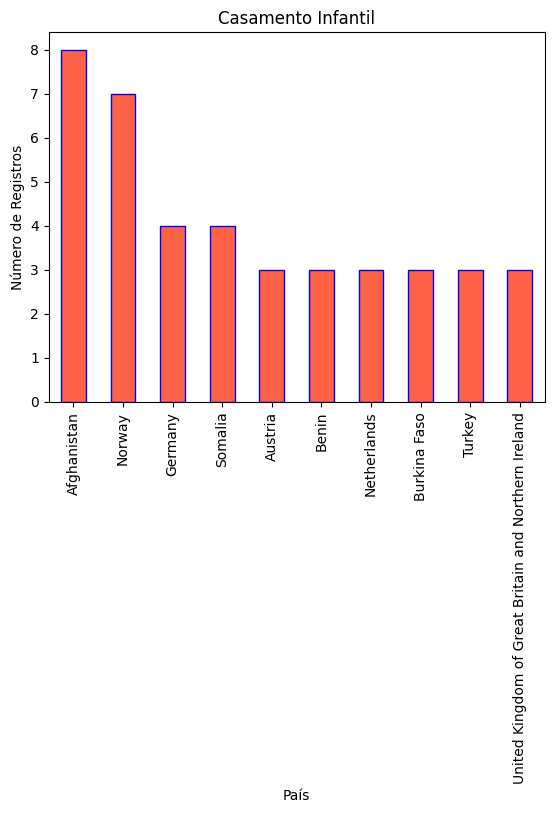

In [28]:
df_filtrado = df[df["Forma de Violencia"] == "Child early and forced marriage"]
contagem_paises = df_filtrado["Pais"].value_counts()
top_10_paises = contagem_paises.head(10)

top_10_paises.plot(kind="bar", edgecolor="blue", color="tomato")
plt.xlabel("País")
plt.ylabel("Número de Registros")
plt.title("Casamento Infantil")
plt.xticks(rotation=90)
plt.show()

Evolução dos registros de violência contra mulheres a partir de 1990

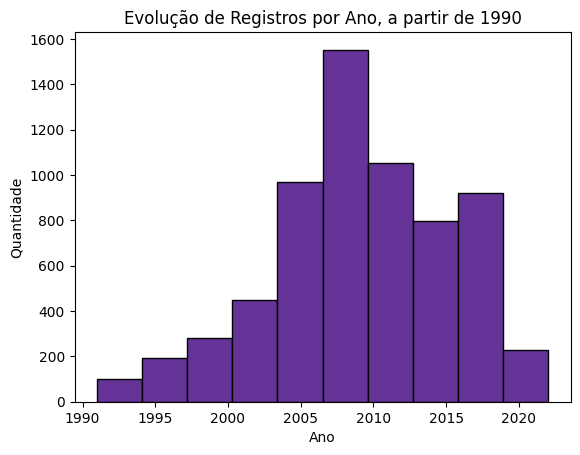

In [29]:
ano_filtrado = df[df["Ano"] > 1990]

ano_filtrado["Ano"].plot.hist(edgecolor="black", color="rebeccapurple")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.title("Evolução de Registros por Ano, a partir de 1990")

plt.show()

Países que mais registram casos de violência contra mulher

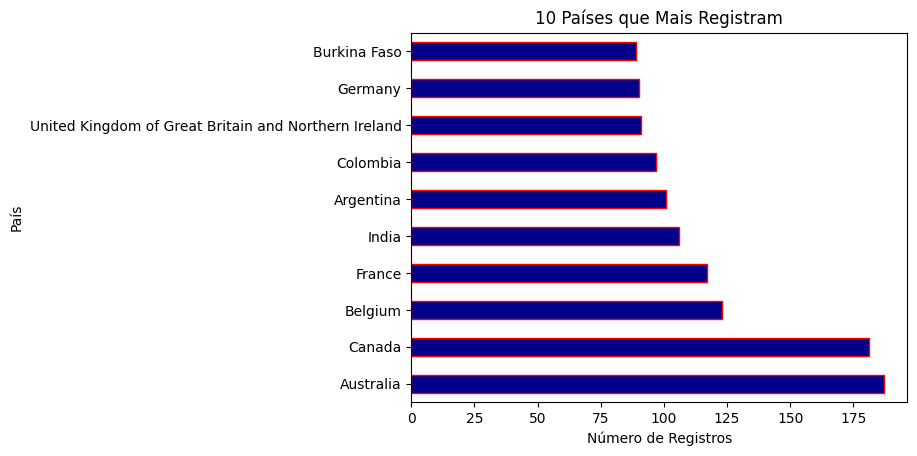

In [50]:
contagem_paises = df["Pais"].value_counts()
top_10_paises = contagem_paises.head(10)

top_10_paises.plot(kind="barh", color="darkblue", edgecolor="red")
plt.ylabel("País")
plt.xlabel("Número de Registros")
plt.title("10 Países que Mais Registram")
plt.xticks(rotation=0)
plt.show()

Países que menos registram casos de violência contra mulher

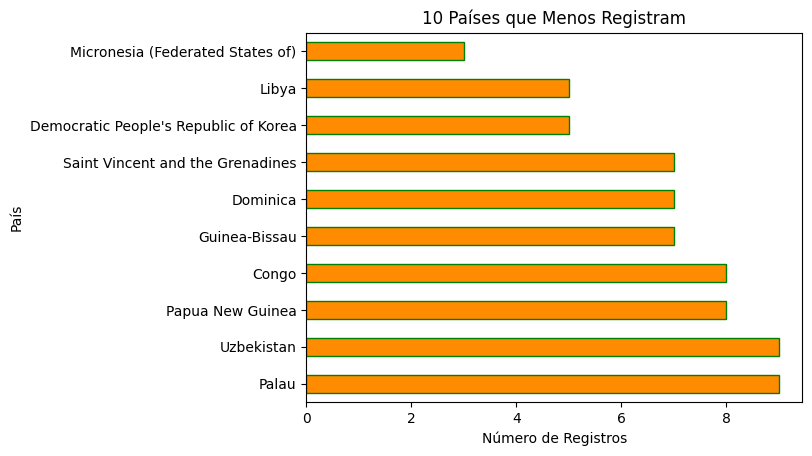

In [55]:
contagem_paises = df["Pais"].value_counts()
top_10_paises = contagem_paises.tail(10)

top_10_paises.plot(kind="barh", color="darkorange", edgecolor="green")
plt.ylabel("País")
plt.xlabel("Número de Registros")
plt.title("10 Países que Menos Registram")
plt.xticks(rotation=0)
plt.show()

### Teste de Hipótese
Hipótese Nula H0: O Brasil não está entre os países que mais registram \
Hipótese Alternativa H1: O Brasil está entre os países que mais registram

In [90]:
from statsmodels.stats.weightstats import ztest

In [100]:
contagem_brazil = df[df["Pais"] == "Brazil"].value_counts()

stats, valor_p = ztest(x1 = contagem_brazil, value = 70, alternative = "larger")

print("Teste Z de Brasil")
print(f"Estatística Z: {stats}")
print(f"Valor P: {valor_p}")


if valor_p < 0.05:
    print("Rejeitamos a hipótese nula. O Brasil está entre os países que mais registram.")
else:
    print("Não rejeitamos a hipótese nula. O Brasil não está entre os países que mais registram.")

Teste Z de Brasil
Estatística Z: -inf
Valor P: 1.0
Não rejeitamos a hipótese nula. O Brasil não está entre os países que mais registram.


c:\Users\Lidi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\weightstats.py:748: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = (value1 - value2 - diff) / std_diff
